<a href="https://colab.research.google.com/github/don3tan/MLCodingChallenge/blob/master/ML_Challenge_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Coding Challenge SVM Notebook - Group: Strangers
> Ning Natalie Lee, Wan Ting Lee, Don Kuk Jun Tan, Martin Klapper


# 1. Preparations

> ## 1.1 Importing Libraries + Prepare Dataset Download


In [56]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


> ## 1.2 Confusion Matrix Labels

In [0]:
labels_dict = {0: "T-shirt/top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle boot"}

> ## 1.3 Remaining Setup Parameters

In [0]:
random_state = 42

# 2. Data Preparation

> ## 2.1 Dataset Download

In [5]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 688, done.
remote: Total 688 (delta 0), reused 0 (delta 0), pack-reused 688
Receiving objects: 100% (688/688), 105.20 MiB | 13.28 MiB/s, done.
Resolving deltas: 100% (397/397), done.


In [6]:
%cd /content/fashion-mnist/utils/
import mnist_reader

/content/fashion-mnist/utils


In [7]:
%cd

/root


In [0]:
x_train, y_train = mnist_reader.load_mnist('/content/fashion-mnist/data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('/content/fashion-mnist/data/fashion', kind='t10k')

In [0]:
x_train = x_train.astype('float32')
y_train = y_train.astype('int')

x_test = x_test.astype('float32')
y_test = y_test.astype('int')

> ## 2.2 Simple Data 'Normalizing'
>> 0<= Pixel Value <= 1

In [0]:
x_train = x_train / 255

x_test = x_test / 255

# 3. Feature Extraction (HOG)
> credit: Martin Klapper, Don Kuk Jun Tan

In [0]:
x_train_hog = []
x_test_hog = []
for a, image in enumerate(x_train):
  train_hog = hog(image.reshape(28,28), orientations = 8, pixels_per_cell = (4,2), cells_per_block = (1,1))
  x_train_hog.append(train_hog)

for b, image in enumerate(x_test):
  test_hog = hog(image.reshape(28,28), orientations = 8, pixels_per_cell = (4,2), cells_per_block = (1,1))
  x_test_hog.append(test_hog)

# 4. Support Vector Machine Training & Prediction
> credit: Martin Klapper

In [40]:
svm = SVC(C = 4, kernel = 'rbf', gamma = 'scale', cache_size = 8192, random_state = random_state)

svm.fit(x_train_hog, y_train)
predict = svm.predict(x_test_hog)

print('Accuracy: {}%'.format(str(accuracy_score(y_test, predict) * 100)))

Accuracy: 90.05%


# 5. Visualizing the result
> credit : Martin Klapper, Don Kuk Jun Tan

Text(0.5, 1.0, 'SVM Predictions - Confusion Matrix')

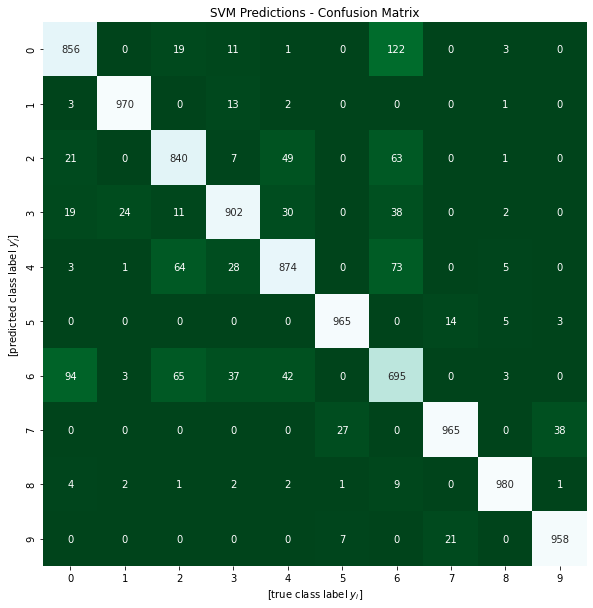

In [57]:
matrix = confusion_matrix(y_test, predict)

plt.figure(figsize=(10, 10))

# plot confusion matrix heatmap
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=labels_dict, yticklabels=labels_dict)

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')

# add plot title
plt.title('SVM Predictions - Confusion Matrix')

In [53]:
orientations = [10]
pixels_per_cell = [(4,4), (7,2), (7,7)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192)
parameters = {'C':[1, 5, 8, 9, 10, 11, 12, 15], 'gamma':['auto', 'scale']}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

KeyboardInterrupt: ignored

In [55]:
orientations = [12]
pixels_per_cell = [(4,4), (7,2), (7,7)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192)
parameters = {'C':[1, 5, 8, 9, 10, 11, 12, 15], 'gamma':['auto', 'scale']}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   50.5s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 

12 (4, 4)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8709
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   56.2s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 

12 (7, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.869
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.3min finished


12 (7, 7)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8314


In [56]:
orientations = [11,12,13,14,15,16]
pixels_per_cell = [(4,4)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[5,6,7]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.9min finished


11 (4, 4)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.874
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   40.4s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.4min finished


12 (4, 4)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8709
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   44.5s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.9min finished


13 (4, 4)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8709999999999999
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   50.7s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.6min finished


14 (4, 4)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8714999999999999
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.1min finished


15 (4, 4)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8717
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   59.8s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.9min finished


16 (4, 4)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8729999999999999


In [58]:
orientations = [11]
pixels_per_cell = [(4,4), (4,2), (2,4), (4,7), (7,4)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[5,6,7]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished


11 (4, 4)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.874
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.6min finished


11 (4, 2)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8749
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.4min finished


11 (2, 4)
SVC(C=7, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8755
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.6min finished


11 (4, 7)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8461000000000001
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.4min finished


11 (7, 4)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8621000000000001


In [59]:
orientations = [10,11,12]
pixels_per_cell = [(2,4), (2,2)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[5,6,7]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.4min finished


10 (2, 4)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8709
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.9min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.3min finished


10 (2, 2)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8766999999999999
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.6min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.0min finished


11 (2, 4)
SVC(C=7, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8755
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 23.6min finished


11 (2, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.873
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.8min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.7min finished


12 (2, 4)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8728
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.3min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 26.2min finished


12 (2, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8725000000000002


In [11]:
orientations = [8, 10]
pixels_per_cell = [(2,2)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[5,6,7]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 17.1min finished


8 (2, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8766999999999999
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.9min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.1min finished


10 (2, 2)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8766999999999999


In [12]:
orientations = [10]
pixels_per_cell = [(2,2), (7,2), (4,2), (2,4), (4,4)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[5,6,7]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.6min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 21.4min finished


10 (2, 2)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8766999999999999
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.5min finished


10 (7, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8668000000000001
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.3min finished


10 (4, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8780999999999999
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.3min finished


10 (2, 4)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8709
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.8min finished


10 (4, 4)
SVC(C=6, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8705


In [14]:
orientations = [6,7,8,9,10]
pixels_per_cell = [(4,2)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[5]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.4min remaining:   55.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


6 (4, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.876
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   48.3s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


7 (4, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8785999999999999
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   57.8s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.9min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


8 (4, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8785999999999999
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.3min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min finished


9 (4, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8758000000000001
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.6min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


10 (4, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8780999999999999


In [15]:
orientations = [8]
pixels_per_cell = [(4,2)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[1,4,5,6,7,10]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.4min finished


8 (4, 2)
SVC(C=4, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8792


In [16]:
orientations = [8]
pixels_per_cell = [(4,2)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[2,2.5,3,3.5,4]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 12.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 12.4min finished


8 (4, 2)
SVC(C=4, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8792


In [17]:
orientations = [8,16]
pixels_per_cell = [(4,2)]

classifier = SVC(kernel = 'rbf', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[4,4.5,5]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.2min finished


8 (4, 2)
SVC(C=4, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8792
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 17.5min finished


16 (4, 2)
SVC(C=4, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8758000000000001


In [18]:
orientations = [8]
pixels_per_cell = [(4,2)]

classifier = SVC(kernel = 'poly', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[4], 'degree': [2,3,4,5]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.6min finished


8 (4, 2)
SVC(C=4, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8789000000000001


In [19]:
orientations = [8]
pixels_per_cell = [(4,2)]

classifier = SVC(kernel = 'sigmoid', random_state = random_state, cache_size = 8192, gamma = 'scale')
parameters = {'C':[4], 'degree': [2,3,4,5]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)

for i in orientations:
  for j in pixels_per_cell:
    x_train_hog = []
    x_test_hog = []
    for a, image in enumerate(x_train):
      train_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_train_hog.append(train_hog)

    for b, image in enumerate(x_test):
      test_hog = hog(image.reshape(28,28), orientations = i, pixels_per_cell = j, cells_per_block = (1,1))
      x_test_hog.append(test_hog)

    clf.fit(x_train_hog, y_train)
    print(i,j)
    print(clf.best_estimator_, clf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.8min finished


8 (4, 2)
SVC(C=4, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8413


In [0]:
#svm = SVC(kernel = 'rbf', C = 2, gamma = 'scale', cache_size = 8192, random_state = random_state)

In [0]:
'''svm.fit(x_train_hog, y_train)
predict = svm.predict(x_test_hog)
print('Accuracy of HOG: {}%'.format(str(accuracy_score(y_test, predict) * 100)))'''

In [0]:
'''svm.fit(x_train, y_train)
predict = svm.predict(x_test)
print('Accuracy of HOG: {}%'.format(str(accuracy_score(y_test, predict) * 100)))'''

best result so far: HOG Features 10, (7,2) ; SVC rbf,C=2, gamma = scale :: 89.5%

In [0]:
'''
8 (4, 2)
SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8785999999999999
    '''

In [0]:
'''
8 (4, 2)
SVC(C=4, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 0.8792
'''